<a href="https://colab.research.google.com/github/ZhanyangZhuSD/UCSD_ML/blob/main/Implementing_L1_and_L2_regularization_using_Sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Implementing L1 and L2 regularization using Sklearn**

This article aims to implement the L2 and L1 regularization for Linear regression using the Ridge and Lasso modules of the Sklearn library of Python. 

https://www.geeksforgeeks.org/ml-implementing-l1-and-l2-regularization-using-sklearn/

**Step 1: Importing the required libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from statistics import mean

In [2]:
from google.colab import files
from os.path import exists
def uploadFile(selectedFile):
  file_not_exists = not exists(selectedFile)
  if file_not_exists: 
    print("Upload this file: ", selectedFile)
    uploaded = files.upload()
    file_exists = exists(selectedFile)
    if file_exists: 
      return True
    else:
      return False
  else:
    print("File is ready to read: ", selectedFile)
    return True

**Step 2: Loading and cleaning the Data**

In [3]:
## kc_house_data https://www.kaggle.com/datasets/shivachandel/kc-house-data
selectedTestFile = 'kc_house_data.csv.zip'
uploadFile(selectedTestFile)

Upload this file:  kc_house_data.csv.zip


Saving kc_house_data.csv.zip to kc_house_data.csv.zip


True

In [19]:
# Loading the data into a Pandas DataFrame
data = pd.read_csv('kc_house_data.csv.zip')
 
# drop row with na
data.dropna(inplace=True)

# Dropping the numerically non-sensical variables
dropColumns = ['id', 'date', 'zipcode']
data = data.drop(dropColumns, axis = 1)
 
# Separating the dependent and independent variables
y = data['price']
X = data.drop('price', axis = 1)

# Dividing the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

**Step 3: Building and evaluating the different models**

*   **Linear Regression**

In [20]:
# Building and fitting the Linear Regression model
linearModel = LinearRegression()
linearModel.fit(X_train, y_train)
 
# Evaluating the Linear Regression model
print(linearModel.score(X_test, y_test))

0.6852376171158294




*   **Ridge(L2) Regression:**

In [27]:
# List to maintain the different cross-validation scores
cross_val_scores_ridge = []
 
# List to maintain the different values of alpha
alpha = []
 
# Loop to compute the different values of cross-validation scores
for i in range(1, 9):
    ridgeModel = Ridge(alpha = i * 0.25)
    ridgeModel.fit(X_train, y_train)
    scores = cross_val_score(ridgeModel, X, y, cv = 10)
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_ridge.append(avg_cross_val_score)
    alpha.append(i * 0.25)
    #print(ridgeModel.score(X_test, y_test))
 
# Loop to print the different values of cross-validation scores
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i]))

0.25 : 69.0901583767101
0.5 : 69.09033468066403
0.75 : 69.09049125083845
1.0 : 69.0906282899927
1.25 : 69.09074599856248
1.5 : 69.09084457469035
1.75 : 69.09092421425656
2.0 : 69.09098511090882


In [24]:

# Building and fitting the Ridge Regression model
ridgeModelChosen = Ridge(alpha = 2)
ridgeModelChosen.fit(X_train, y_train)
 
# Evaluating the Ridge Regression model
print(ridgeModelChosen.score(X_test, y_test))

0.6853591325747228



*  **Lasso(L1) Regression:**




In [28]:
# List to maintain the cross-validation scores
cross_val_scores_lasso = []
 
# List to maintain the different values of Lambda
Lambda = []
 
# Loop to compute the cross-validation scores
for i in range(1, 9):
    lassoModel = Lasso(alpha = i * 0.25, tol = 0.0925)
    lassoModel.fit(X_train, y_train)
    scores = cross_val_score(lassoModel, X, y, cv = 10)
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_lasso.append(avg_cross_val_score)
    Lambda.append(i * 0.25)
 
# Loop to print the different values of cross-validation scores
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_lasso[i]))

0.25 : 69.08996762461632
0.5 : 69.08997309354581
0.75 : 69.08997853389319
1.0 : 69.08998394768221
1.25 : 69.0899893270766
1.5 : 69.08999467945569
1.75 : 69.09000001882953
2.0 : 69.09000531192423


In [29]:

# Building and fitting the Lasso Regression Model
lassoModelChosen = Lasso(alpha = 2, tol = 0.0925)
lassoModelChosen.fit(X_train, y_train)
 
# Evaluating the Lasso Regression model
print(lassoModelChosen.score(X_test, y_test))

0.6852413250461611


**Step 4: Comparing and Visualizing the results**

In [30]:
# Building the two lists for visualization
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']
scores = [linearModel.score(X_test, y_test),
         ridgeModelChosen.score(X_test, y_test),
         lassoModelChosen.score(X_test, y_test)]
 
# Building the dictionary to compare the scores
mapping = {}
mapping['Linear Regression'] = linearModel.score(X_test, y_test)
mapping['Ridge Regression'] = ridgeModelChosen.score(X_test, y_test)
mapping['Lasso Regression'] = lassoModelChosen.score(X_test, y_test)
 
# Printing the scores for different models
for key, val in mapping.items():
    print(str(key)+' : '+str(val))

Linear Regression : 0.6852376171158294
Ridge Regression : 0.6853591325747228
Lasso Regression : 0.6852413250461611


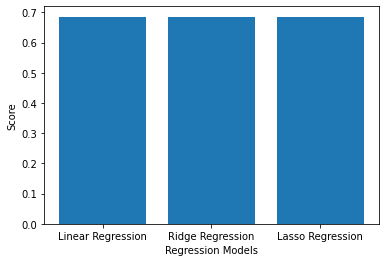

In [31]:
# Plotting the scores
plt.bar(models, scores)
plt.xlabel('Regression Models')
plt.ylabel('Score')
plt.show()